#*Samriddh Singh*
## **GRIP @ TSF TASK - 1**
### PROBLEM GIST: Given the number of hours invested, what is the predicted score for a student.
The task 1 requires to use simple linear regression model and display the result for a test data point at 9.25 hr.


In [29]:
# Importing the required libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

In [4]:
# Loading the dataset and displaying brief information
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# Checking for any NaN values.
print("NaN values in  Hours:{}".format(df.Hours.isna().sum()))
print("NaN values in  Scores:{}".format(df.Scores.isna().sum()))

NaN values in  Hours:0
NaN values in  Scores:0


Text(0.5, 1.0, 'Plotting the data points')

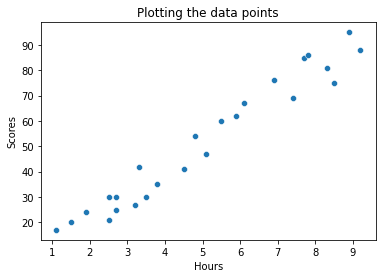

In [9]:
#Eyeballing the input data distribution 
sns.scatterplot(x = df.Hours , y = df.Scores ).set_title("Plotting the data points")

Since the scatter plot shows that all the point apporiximate about a straight line, we will go for a linear regression.

 **Taking the 4 linear regression assumptions**

1. **Linearity**: 

    The relationship between X and the mean of Y is linear. A linear regression model would not fit such data points which estimate any other curve. 
2. **Homoscedasticity:** The variance of residual is the same for any value of X. 

    This basicaly means that our data should be uniformly spread out about the mean for all data points, otherwise anomalies and deviations from linear model may occur.
3. **Independence:** Observations are independent of each other.
4. **Normality:** For any fixed value of X, Y is normally distributed.

In [64]:
#Slicing out the label(namely-score) and feature(namely-hours) from the dataset
x = df.iloc[:, :-1].values.reshape(-1, 1)
y = df.iloc[:,1]

In [55]:
#Splitting the dataset into a training and test set with test size being 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  
regressor = LinearRegression()  

In [56]:
# Fitting the regressor object on our training set
regressor.fit(x_train.reshape(-1,1), y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
# Predicting the scores for test set data based on the regressor we just trained.
y_pred = regressor.predict(x_test.reshape(-1,1)) # Predicting the score

Slope of line is:[9.91065648]
The intercept :2.018160041434662


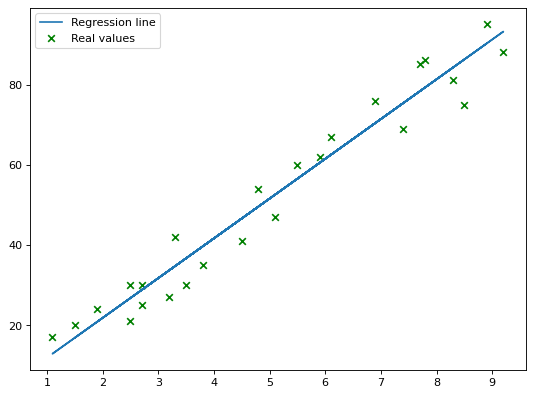

In [57]:
# Plotting the regression line to represent the predicted regression line against the data on which it was trained.
print("Slope of line is:{}".format(regressor.coef_))
print("The intercept :{}".format(regressor.intercept_))
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Plotting for the test data
plt.scatter(x, y,color = 'green',marker = "x", label = "Real values")
plt.plot(x, regressor.coef_*X+regressor.intercept_ , label = "Regression line")
plt.legend(loc="upper left")
plt.show()

In [66]:
#Storing the result as a dataset
result = pd.DataFrame({'Test set': y_test, 'Predicted':y_pred, 'Deviation': y_test-y_pred })
result

,Tested,Predicted,Deviation
5,20,16.884145,3.115855
2,27,33.732261,-6.732261
19,69,75.357018,-6.357018
16,30,26.794801,3.205199
11,62,60.491033,1.508967


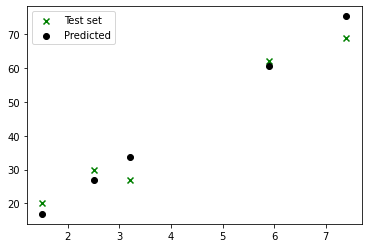

In [67]:
# Displaying the predicted outcomes and ideal outcomes of test data
plt.scatter(x_test, y_test,color = 'green',marker = "x", label = "Test set")
plt.scatter(x_test, y_pred,color = 'black',marker = "o", label = "Predicted")
plt.legend()
plt.show()


Text(0.5, 1.0, 'Normalised Error in predictions')

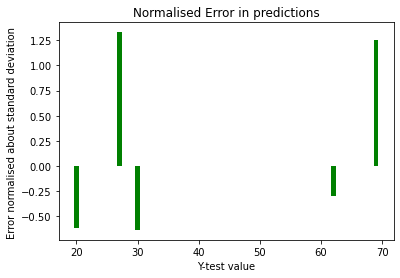

In [96]:
#To visualise the error about each data point
norm = result["Deviation"].std()
result["Deviation"] = result["Deviation"].div(norm)
plt.bar(y_test, result["Deviation"], color='green')
plt.xlabel("Y-test value")
plt.ylabel("Error normalised about standard deviation ")
plt.title("Normalised Error in predictions")

In [93]:
#Training score and test scores
print("Training Score:",regressor.score(x_train.reshape(-1,1),y_train))
print("Test Score:",regressor.score(x_test.reshape(-1,1),y_test))

Training Score: 0.9515510725211553
Test Score: 0.9454906892105354


Since the scores are quite close to each other we can say that it is fit well.

In [98]:
# Answer : 
test = np.array([9.25])
test = test.reshape(-1, 1)
answer = regressor.predict(test)
print("No of Hours = 9.25")
print("Predicted Score = {}".format(answer[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


1. Mean absolute error is the mean of absolute differences in values of deviations from the ideal test points.
2. Mean Squared error squares the differences instead of taking the absolute value. 
3. RMSE = SQRT(MSE)
4. R^2 score is given by R^2= 1− (Total Variation / Unexplained Variation)
R-Squared is a statistical measure of fit that indicates how much variation of a dependent variable is explained by the independent variable(s) in a regression model.


In [95]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354
